Introduce

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Text(0, 0.5, 'Weight (kg)')

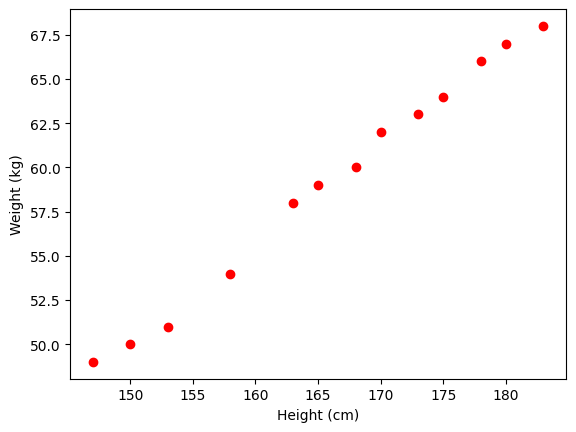

In [2]:
# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
plt.plot(X, y, 'ro')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

Text(0, 0.5, 'Weight (kg)')

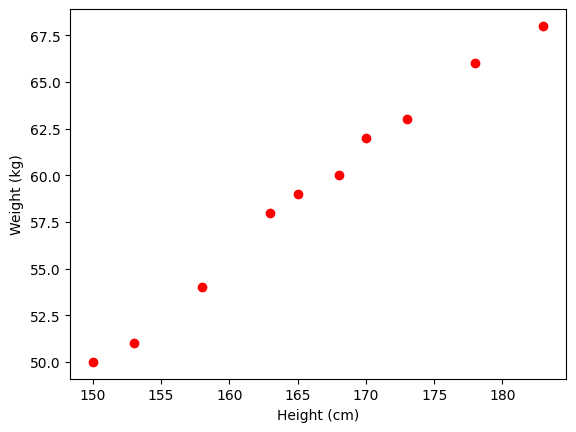

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
plt.plot(X_train, y_train, 'ro')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

                                            Project 01: Predicttion: App vs Web: Where to Invest?

#1: Import libraries.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import matplotlib as plt
import seaborn as sns
%matplotlib inline

#2: Data

In [5]:
data = pd.read_csv('D:\python\Machine Learning\Linear Regression\Ecommerce Customers.csv')
used_data = data.drop(['Email', 'Address', 'Avatar'], axis=1)
used_data.head()

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5772\3747303757.py:1: SyntaxWarning: invalid escape sequence '\p'
  data = pd.read_csv('D:\python\Machine Learning\Linear Regression\Ecommerce Customers.csv')


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
used_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [7]:
used_data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
used_data.sum().isnull()

Avg. Session Length     False
Time on App             False
Time on Website         False
Length of Membership    False
Yearly Amount Spent     False
dtype: bool

#4: Data Visualization

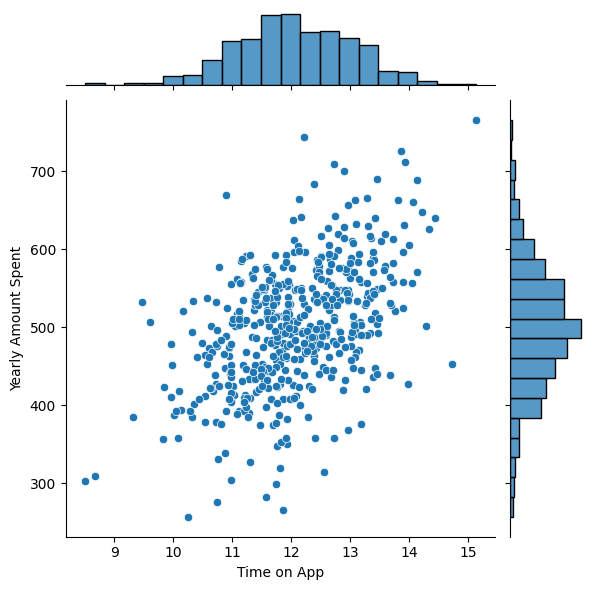

In [9]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=used_data)

#N

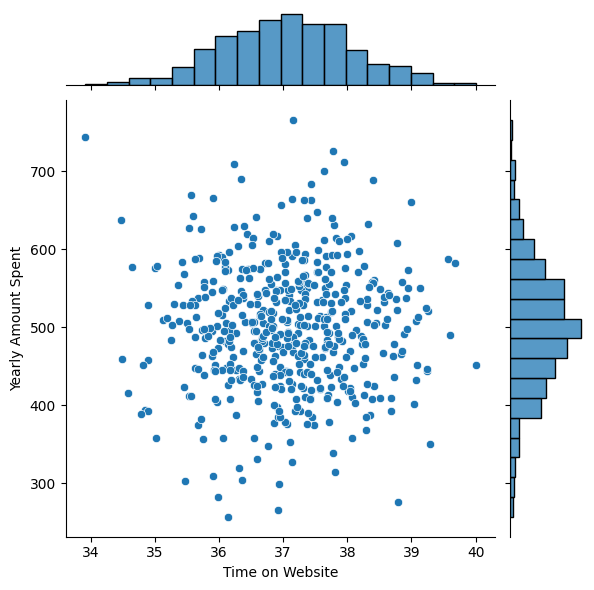

In [10]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=used_data)

#4: Trainning Model

In [11]:
X = used_data[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
Y = used_data[['Yearly Amount Spent']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
lm = LinearRegression()
lm.fit(X_train, y_train,)
y_predicted = lm.predict(X_test)

#5: Evaluation

In [12]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_predicted)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_predicted)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predicted))))

MAE: 7.228148653430811
MSE: 79.81305165097385
RMSE: 8.9338150669786


In [13]:
print(lm.coef_)

[[25.98154972 38.59015875  0.19040528 61.27909654]]


In [14]:
pd.DataFrame(lm.coef_.T , index=['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership'], columns=['Coeffecient'])

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Because coeffecient of Time on App better than coefecient of Time on Website so I think the company should focus to develop on App